<a href="https://colab.research.google.com/github/danieljaouen/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [2]:
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip

--2019-07-18 22:16:24--  https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2019Q1.csv.zip.1’

LoanStats_2019Q1.cs     [    <=>             ]  19.30M   836KB/s    in 24s     

2019-07-18 22:16:49 (830 KB/s) - ‘LoanStats_2019Q1.csv.zip.1’ saved [20240936]



In [3]:
!unzip LoanStats_2019Q1.csv.zip

Archive:  LoanStats_2019Q1.csv.zip
replace LoanStats_2019Q1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
!head LoanStats_2019Q1.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [5]:
import pandas as pd

df = pd.read_csv('LoanStats_2019Q1.csv', skiprows=1, skipfooter=2, engine='python')
print(df.shape)
df.head()

(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,...,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,...,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,...,71.4,0,0,69911,37816,11400,35811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000,35000,35000,36 months,15.57%,1223.08,C,C3,Store Manager,10+ years,RENT,122000.0,Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,22.00,1,Dec-2009,0,20.0,NaN,5,0,1441,24.4%,18,w,33459.43,33459.43,2446.76,2446.76,...,100.0,0,0,65640,24471,1600,59740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000,5000,5000,36 months,15.57%,174.73,C,C3,Area Manager,3 years,OWN,65000.0,Verified,Mar-2019,Current,n,NaN,NaN,house,Home buying,640xx,MO,16.28,1,Jul-2001,0,7.0,NaN,9,0,5604,64.4%,25,w,4778.86,4778.86,340.81,340.81,...,50.0,0,0,38190,29775,4400,29490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()

id                                            115675
member_id                                     115675
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      19518
emp_length                                     11101
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [7]:
df[df.loan_amnt.isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115675 entries, 0 to 115674
Columns: 144 entries, id to settlement_term
dtypes: float64(56), int64(52), object(36)
memory usage: 127.1+ MB


In [0]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [10]:
df.head().T

,0,1,2,3,4
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,20000,12000,3000,35000,5000
funded_amnt,20000,12000,3000,35000,5000
funded_amnt_inv,20000,12000,3000,35000,5000
term,60 months,36 months,36 months,36 months,36 months
int_rate,17.19%,16.40%,14.74%,15.57%,15.57%
installment,499.1,424.26,103.62,1223.08,174.73
grade,C,C,C,C,C
sub_grade,C5,C4,C2,C3,C3


## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [11]:
df.describe(include='object')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,115675,115675,115675,115675,96157,104574,115675,115675,115675,115675,115675,115675,115675,115675,115675,115675,115546,115675,115445,110769,115673,115675,14624,16681,115675,1,1,1,1,1,1,1,115675,1,1,1
unique,2,53,7,33,39387,11,5,3,3,6,1,12,12,877,50,652,1055,2,7,3,7,2,3,577,2,1,1,1,1,1,1,1,2,1,1,1
top,36 months,8.19%,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Jan-2019,Current,n,debt_consolidation,Debt consolidation,750xx,CA,Aug-2006,0%,w,Jun-2019,Jul-2019,Jun-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,INCOME_CURTAILMENT,ACTIVE,Jun-2019,Sep-2019,Jul-2019,In Grace Period,N,May-2019,ACTIVE,May-2019
freq,78429,11314,37060,11314,2037,34490,58578,54608,43584,109176,115675,63747,63747,1162,15902,1033,1054,101423,102101,110738,111240,98994,6395,150,115674,1,1,1,1,1,1,1,115674,1,1,1


### Convert `int_rate`



In [12]:
x = '12.5%'
float(x.strip('%'))

12.5

In [0]:
df = pd.read_csv('LoanStats_2019Q1.csv', skiprows=1, skipfooter=2, engine='python')
df['int rate'] = df.int_rate.str.strip('%').astype('float')

In [14]:
df['int rate'].head()

0    17.19
1    16.40
2    14.74
3    15.57
4    15.57
Name: int rate, dtype: float64

Define a function to remove percent signs from strings and convert to floats

Apply the function to the `int_rate` column

In [15]:
def remove_percent_sign(string):
    return float(string.strip('%'))
  
remove_percent_sign(x)

12.5

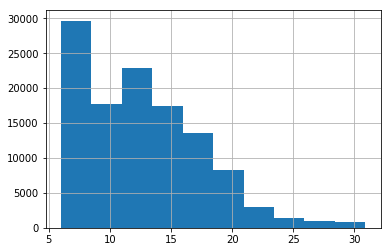

In [16]:
df['int rate'] = df['int_rate'].apply(remove_percent_sign)
df['int rate'].hist()

### Clean `emp_title`

Look at top 20 titles

In [17]:
df.emp_title.value_counts(dropna=False).head(20)

NaN                         19518
Teacher                      2037
Manager                      1626
Registered Nurse              898
Driver                        857
Supervisor                    655
RN                            623
Sales                         586
Office Manager                574
Project Manager               540
General Manager               486
Owner                         449
Director                      374
Operations Manager            313
Engineer                      309
Truck Driver                  308
Sales Manager                 288
Nurse                         281
Administrative Assistant      267
Supervisor                    260
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [18]:
df.emp_title.isna().sum() / len(df)

0.1687313594121461

Clean the title and handle missing values
- Capitalize
- Strip spaces
- Replace NaN with missing

In [0]:
import numpy as np
example = ['owner', 'Supervisor ', ' Project manager', np.nan]

def clean_emp_title(s):
    if isinstance(s, str):
        return s.strip().title()
    else:
        return 'Missing'
      


In [0]:
df['emp_title'] = df['emp_title'].apply(clean_emp_title)

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains('manage', case=False)

In [22]:
df.groupby('emp_title_manager')['int rate'].mean()

emp_title_manager
False    12.746655
True     12.561393
Name: int rate, dtype: float64

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [0]:
df['issue d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [24]:
df['issue d'].describe()

count                  115675
unique                      3
top       2019-01-01 00:00:00
freq                    43584
first     2019-01-01 00:00:00
last      2019-03-01 00:00:00
Name: issue d, dtype: object

In [25]:
df['issue d'].iloc[0:5].dt.month

0    3
1    3
2    3
3    3
4    3
Name: issue d, dtype: int64

In [0]:
df['earliest cr line'] = pd.to_datetime(df['earliest_cr_line'])

In [0]:
df['days_since_earliest_cr_line'] = (df['issue d'] - df['earliest cr line']).dt.days

In [28]:
df['days_since_earliest_cr_line'].describe()

count    115675.000000
mean       5972.244634
std        2904.216417
min        1124.000000
25%        4141.000000
50%        5358.000000
75%        7367.000000
max       27453.000000
Name: days_since_earliest_cr_line, dtype: float64

In [29]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
for col in ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']:
    df[col] = pd.to_datetime(df[col])

In [31]:
df.describe(include='datetime')

,last_pymnt_d,next_pymnt_d,last_credit_pull_d,issue d,earliest cr line
count,115445,110769,115673,115675,115675
unique,7,3,7,3,652
top,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-06-01 00:00:00,2019-01-01 00:00:00,2006-08-01 00:00:00
freq,102101,110738,111240,43584,1033
first,2019-01-01 00:00:00,2019-06-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,1944-01-01 00:00:00
last,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-06-01 00:00:00,2019-03-01 00:00:00,2016-02-01 00:00:00


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [32]:
# replicate the lesson
import pandas as pd
df2 = pd.read_csv('LoanStats_2019Q1.csv', skiprows=1, skipfooter=2, engine='python')
df2['int rate'] = df2.int_rate.str.strip('%').astype('float')

def remove_percent_sign(string):
    return float(string.strip('%'))

df2['int rate'] = df2['int_rate'].apply(remove_percent_sign)

def clean_emp_title(s):
    if isinstance(s, str):
        return s.strip().title()
    else:
        return 'Missing'
      
df2['emp_title'] = df2['emp_title'].apply(clean_emp_title)
df2['emp_title_manager'] = df2['emp_title'].str.contains('manage', case=False)

df2['issue d'] = pd.to_datetime(df2['issue_d'], infer_datetime_format=True)
df2['earliest cr line'] = pd.to_datetime(df2['earliest_cr_line'], infer_datetime_format=True)
df2['days_since_earliest_cr_line'] = (df2['issue d'] - df2['earliest cr line']).dt.days

for col in ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']:
    df2[col] = pd.to_datetime(df2[col], infer_datetime_format=True)
    
df2.describe(include='datetime')

,last_pymnt_d,next_pymnt_d,last_credit_pull_d,issue d,earliest cr line
count,115445,110769,115673,115675,115675
unique,7,3,7,3,652
top,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-06-01 00:00:00,2019-01-01 00:00:00,2006-08-01 00:00:00
freq,102101,110738,111240,43584,1033
first,2019-01-01 00:00:00,2019-06-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,1944-01-01 00:00:00
last,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-06-01 00:00:00,2019-03-01 00:00:00,2016-02-01 00:00:00


In [0]:
# convert the term column from string to integer
df2['term2'] = df2['term'].str.strip(' months').astype('int')

In [34]:
# make a column named loan_status_is_great
import numpy as np

df2['loan_status_is_great'] = np.where((df2['loan_status'] == 'Current') | (df2['loan_status'] == 'Fully Paid'), 1, 0)
df2['loan_status_is_great'].value_counts()

1    113906
0      1769
Name: loan_status_is_great, dtype: int64

In [35]:
df2['last_pymnt_d_year'] = df2['last_pymnt_d'].dt.year
df2['last_pymnt_d_month'] = df2['last_pymnt_d'].dt.month
df2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,...,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int rate,emp_title_manager,issue d,earliest cr line,days_since_earliest_cr_line,term2,loan_status_is_great,last_pymnt_d_year,last_pymnt_d_month
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front Desk Supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,745.24,713.86,0.00,0.0,0.0,2019-06-01,499.10,2019-07-01,2019-06-01,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,...,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.19,False,2019-03-01,2006-09-01,4564,60,1,2019.0,6.0
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,524.08,302.57,0.00,0.0,0.0,2019-05-01,424.26,2019-07-01,2019-06-01,0,30.0,1,Individual,NaN,NaN,NaN,0,0,176551,1,5,2,5,7.0,35115,65.0,3,6,4899,65.0,25600,4,0,3,12,...,0,0,316.0,269,5,5,2,12.0,58.0,7.0,29.0,1,6,8,6,9,10,13,23,8,19,0.0,0,0,6,80.6,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.40,False,2019-03-01,1992-11-01,9616,36,1,2019.0,5.0
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,M

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01